# Signal Processing
## Week \#5 Lab: IIR Filter Design

### Introduction

Analog filters generally have infinitely long impulse responses, and there are well-developed techniques for analog filter design. The design of discrete-time infinite duration impulse (IIR) filters are typically designed using these analog filter prototypes (Butterworth, Chebyshev, and elliptic) following this process:

1. Transform discrete-time specifications to continuous-time design specifications
2. Design a continuous-time filter using well-established methods that include closed-form formulas
3. Convert the continuous-time filter into a discrete-time filter using an appropriate complex-valued mapping

This design approach for IIR filters specifies constraints on the magnitude response, and there is no control over the phase response. This is a magnitude-only design process, and the phase (and resulting group delay) is investigated after the design is completed. Lowpass prototypes are usually designed, and then a frequency band transformation is used to convert the prototype filter into another type of frequency selective filter (bandstop, bandpass, highpass).

### Install Python Packages

Import the necessary Python modules to implement the lab.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### User-Defined Functions

Below, we define a function to create a pole-zero plot for a discrete-time system.

In [3]:
# user-defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(b, a):
    (zeros, poles, gain) = signal.tf2zpk(b, a)
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko',markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2,2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title("Pole-Zero Plot")
    return (zeros, poles, gain)

### IIR Filter Design

The signal processing __[subpackage](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)__ of __[Scipy](https://docs.scipy.org/doc/scipy/reference/main_namespace.html)__ provides tools for signal processing, including filtering and filter design. These tools allow the user to specify the discrete-time filter specifications and then to directly obtain the discrete-time filter coefficients with the analog filter design, frequency-band transformation, and analog to discrete-time transformations incorporated. Functions also exist to separately design analog filters, transform them to different frequency bands, and then transform the filter to discrete-time (impulse invariance or bilinear transformation). In the following, we design various Butterworth filters and plot the frequency response, phase response, group delay, and poles/zeros. Notice that `np.unwrap` is used to convert the phase response to a continuous phase response (eliminates the 2pi jumps in phase).

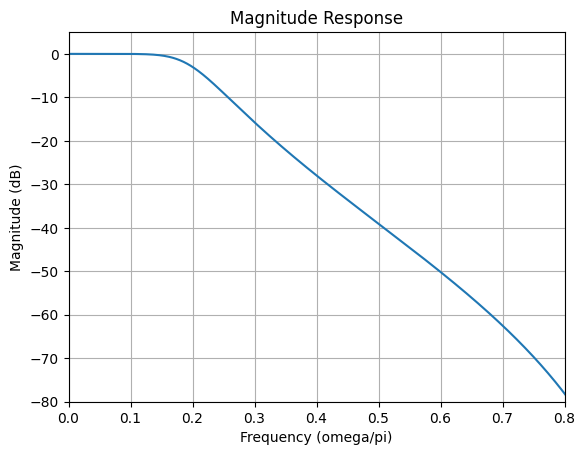

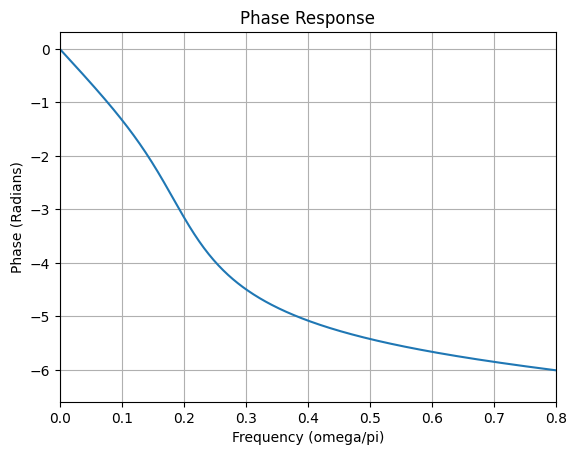

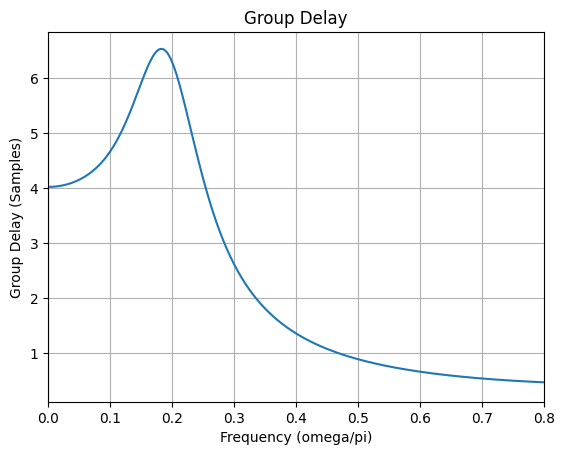

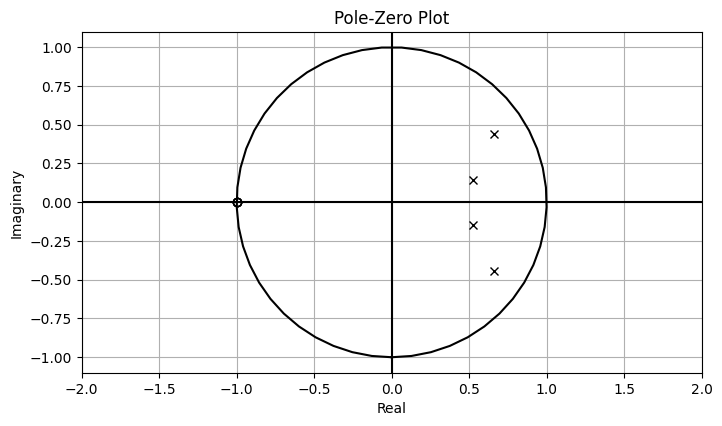

In [4]:
# Create filter specifications
Fs = 1000 # sample rate, samples/second
Fc = 100 # cutoff frequency
order = 4 # filter order

# Design filter
b, a = signal.butter(order, Fc, btype='low', fs=Fs)

# Compute frequency response, group delay, and impulse response
omega, H = signal.freqz(b, a)
w, gd = signal.group_delay((b, a))

# Plot results
fig, ax1 = plt.subplots()
ax1.set_title('Magnitude Response')
ax1.plot(omega/np.pi, 20*np.log10(np.abs(H)))
ax1.set_xlabel('Frequency (omega/pi)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_xlim([0, 0.8])
ax1.set_ylim([-80, 5])
ax1.grid()

# np.unwrap used to get continuous phase
fig, ax2 = plt.subplots()
ax2.plot(omega/np.pi, np.unwrap(np.angle(H)))
ax2.set_title('Phase Response')
ax2.set_xlabel('Frequency (omega/pi)')
ax2.set_ylabel('Phase (Radians)')
ax2.set_xlim([0, 0.8])
ax2.grid()

fig, ax3 = plt.subplots()
ax3.plot(w/np.pi,gd)
ax3.set_title('Group Delay')
ax3.set_xlabel('Frequency (omega/pi)')
ax3.set_ylabel('Group Delay (Samples)')
ax3.set_xlim([0, 0.8])
ax3.grid()

PoleZeroPlot(b,a);

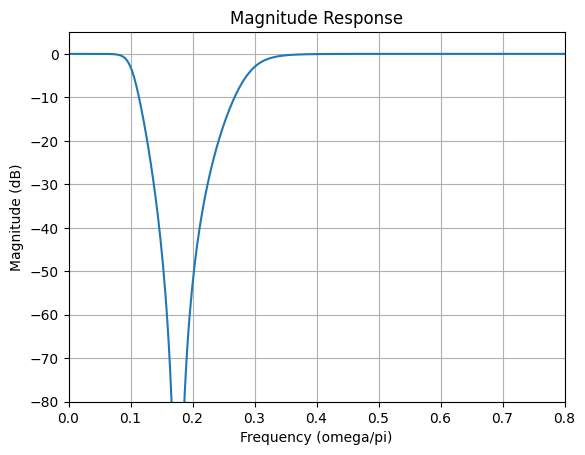

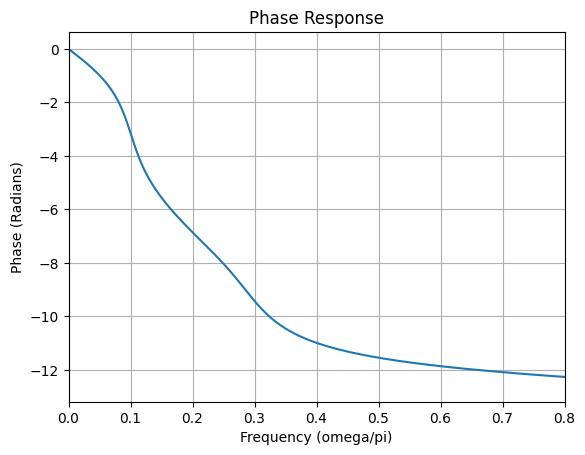

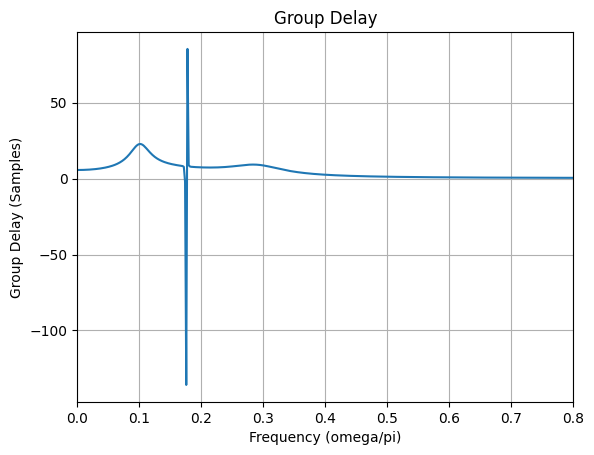

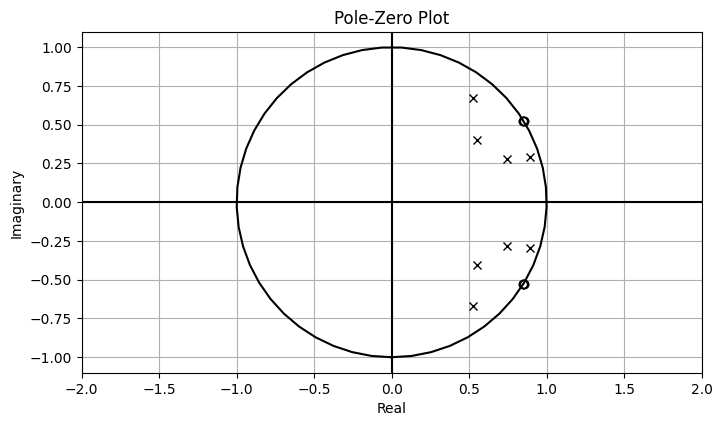

In [5]:
# Create filter specifications for a Butterworth bandstop (notch) filter
Fs = 1000 # sample rate, samples/second
F1 = 50 # lower stopband frequency
F2 = 150 # upper stopband frequency
order = 4 # filter order

# Design filter
b, a = signal.butter(order, (F1, F2), btype='bandstop', fs=Fs)

# Compute frequency response, group delay, and impulse response
omega, H = signal.freqz(b, a)
w, gd = signal.group_delay((b, a))

# Plot results
fig, ax1 = plt.subplots()
ax1.set_title('Magnitude Response')
ax1.plot(omega/np.pi, 20*np.log10(np.abs(H)))
ax1.set_xlabel('Frequency (omega/pi)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_xlim([0, 0.8])
ax1.set_ylim([-80, 5])
ax1.grid()

fig, ax2 = plt.subplots()
ax2.plot(omega/np.pi, np.unwrap(np.angle(H)))
ax2.set_title('Phase Response')
ax2.set_xlabel('Frequency (omega/pi)')
ax2.set_ylabel('Phase (Radians)')
ax2.set_xlim([0, 0.8])
ax2.grid()

fig, ax3 = plt.subplots()
ax3.plot(w/np.pi,gd)
ax3.set_title('Group Delay')
ax3.set_xlabel('Frequency (omega/pi)')
ax3.set_ylabel('Group Delay (Samples)')
ax3.set_xlim([0, 0.8])
ax3.grid()

PoleZeroPlot(b,a);

### Filtering

In the example below, we create a signal with various frequency components and then apply a frequency-selective filter to this data to remove a frequency component. The results are plotted in the time domain. Later in this course, we will investigate different filter structures for implementing discrete-time systems to reduce numerical issues. It is common to implement filters by cascading second-order sections. The b and a filter coefficients are converted to coefficients for these second-order sections. In this example, we use the option to design a filter directly to the second-order sections and then implement the filtering with __['scipy.signal.sosfilt'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html)__ which takes the second-order sections along with the data and returns the filtered data. Applying a filter twice, once forward and then backward, will create a zero-phase filter (no group delay), but this is a non-causal implementation that we can implement using `signal.sosfiltfilt` since we have all of the data here and are not processing it in real-time. The results below show filtering with second-order sections.

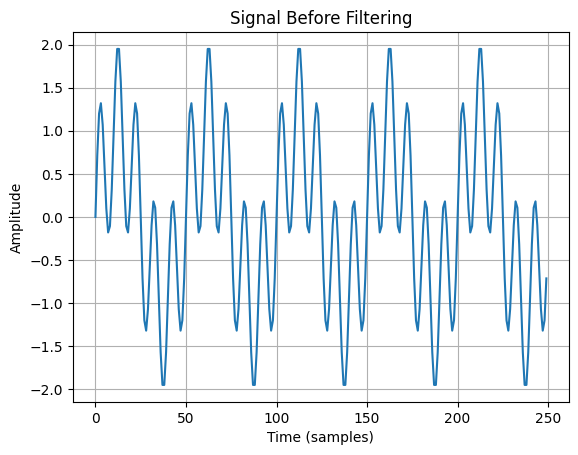

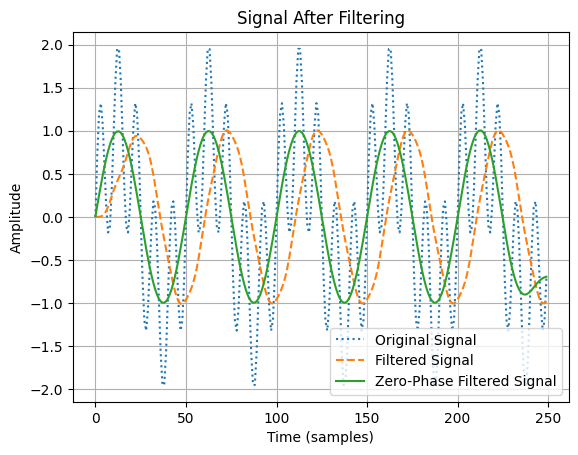

In [6]:
# Filtering example (using second-order sections)

# Define signal with multiple frequency components
F1 = 100 # frequency of first component at 100 Hz
F2 = 500 # frequency of second component at 500 Hz
Fs = 5000 # sample frequency
T = 1/Fs
nT = np.arange(0,.05,T)
x = np.sin(2 * np.pi * F1 * nT) + np.sin(2 * np.pi * F2 * nT)

# Plot signal before filtering
plt.plot(x)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Signal Before Filtering')
plt.grid()

# Create filter specifications for a Butterworth lowpass
# (using second-order sections for implementation)
Fc = 200 # cutoff frequency
order = 4 # filter order

# Design filter
filtersos = signal.butter(order, Fc, btype='low', output='sos', fs=Fs)

# Implement Filter
y = signal.sosfilt(filtersos, x)
yzerophase = signal.sosfiltfilt(filtersos, x)

# Plot signal after filtering
fig, ax1 = plt.subplots()
ax1.plot(x, ':')
ax1.plot(y,'--')
ax1.plot(yzerophase,)
ax1.set_title('Signal After Filtering')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')
ax1.legend(['Original Signal', 'Filtered Signal', 'Zero-Phase Filtered Signal'],loc='lower right');
ax1.grid()


## Exercises

#### *Insert Your Name Here:*

## Exercise #1

In this exercise, you will compare Butterworth, Chebyshev (type 1 and type 2), and elliptic filters and the order required to achieve the same specifications. Create lowpass filters of each of these four types with a normalized cutoff frequency of pi/2. Plot each filter's magnitude response, phase response, group delay, and pole-zero plots. The `scipy.signal` package provides functions to return the lowest order required to meet your specifications. For example, the function __[`signal.ellipord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html)__ will return the lowest order for an elliptic filter to meet a set of specifications:

`order, wc = signal.ellipord(0.5, 0.6, 0.3, 30)`

where `order` and `wc` can be used in `signal.ellip` to design the elliptic filter.

Your filters should be designed to meet or exceed the following specifications:

-  passband edge frequency: 0.5pi
-  stopband edge frequency: 0.6pi
-  minimum passband gain: -0.3 dB
-  maximum stopband gain: -30 dB

Explain your results and insight. You can compare your results to example 7.4 of the textbook. Due to numerical issues at the end of the group delay vector, you can avoid plotting the end of the group delay array.

<ipython-input-1-324482bb97b1>:31: UserWarning: The filter's denominator is extremely small at frequencies [3.135],             around which a singularity may be present
  gd = signal.group_delay((b, a))[1]


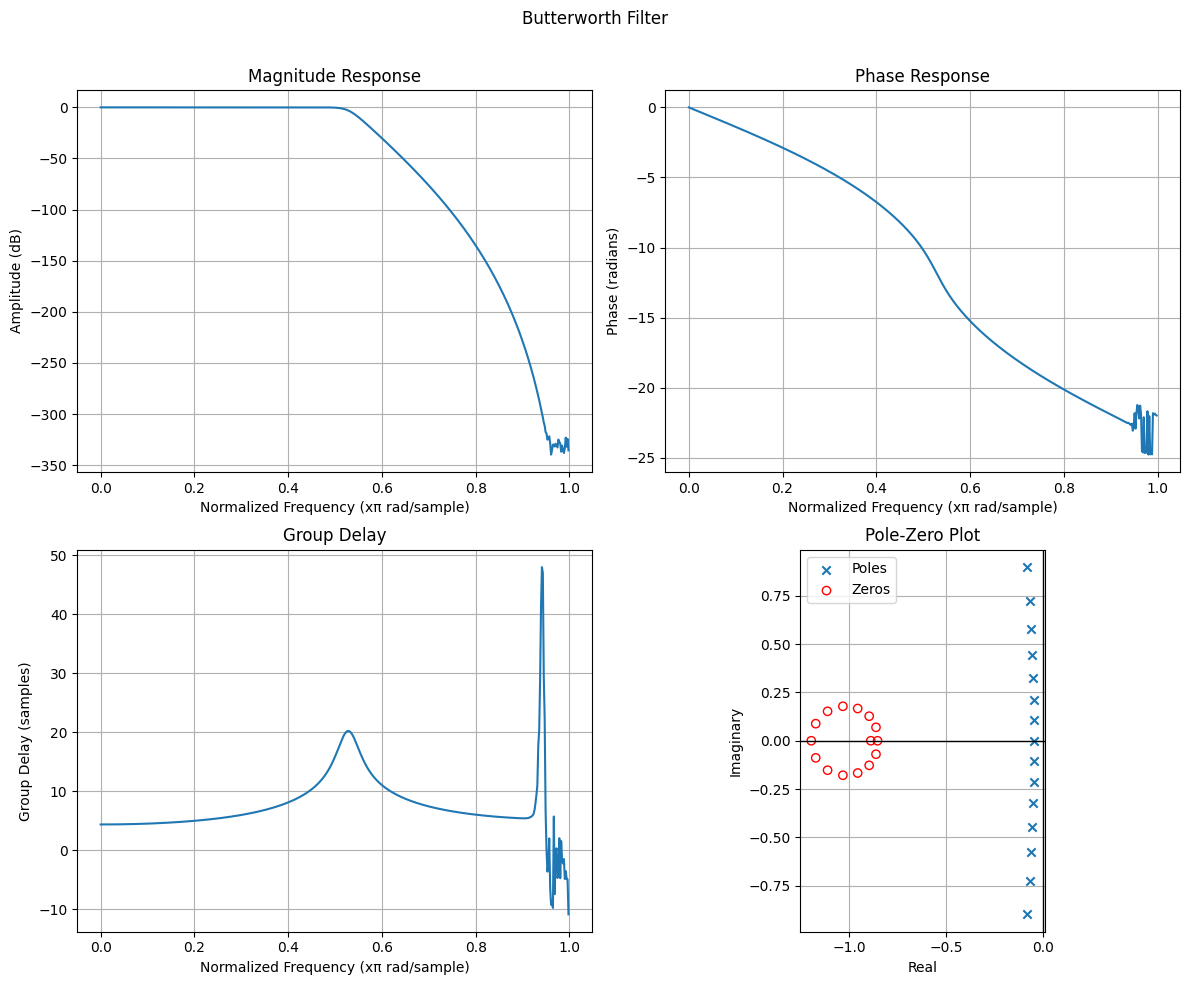

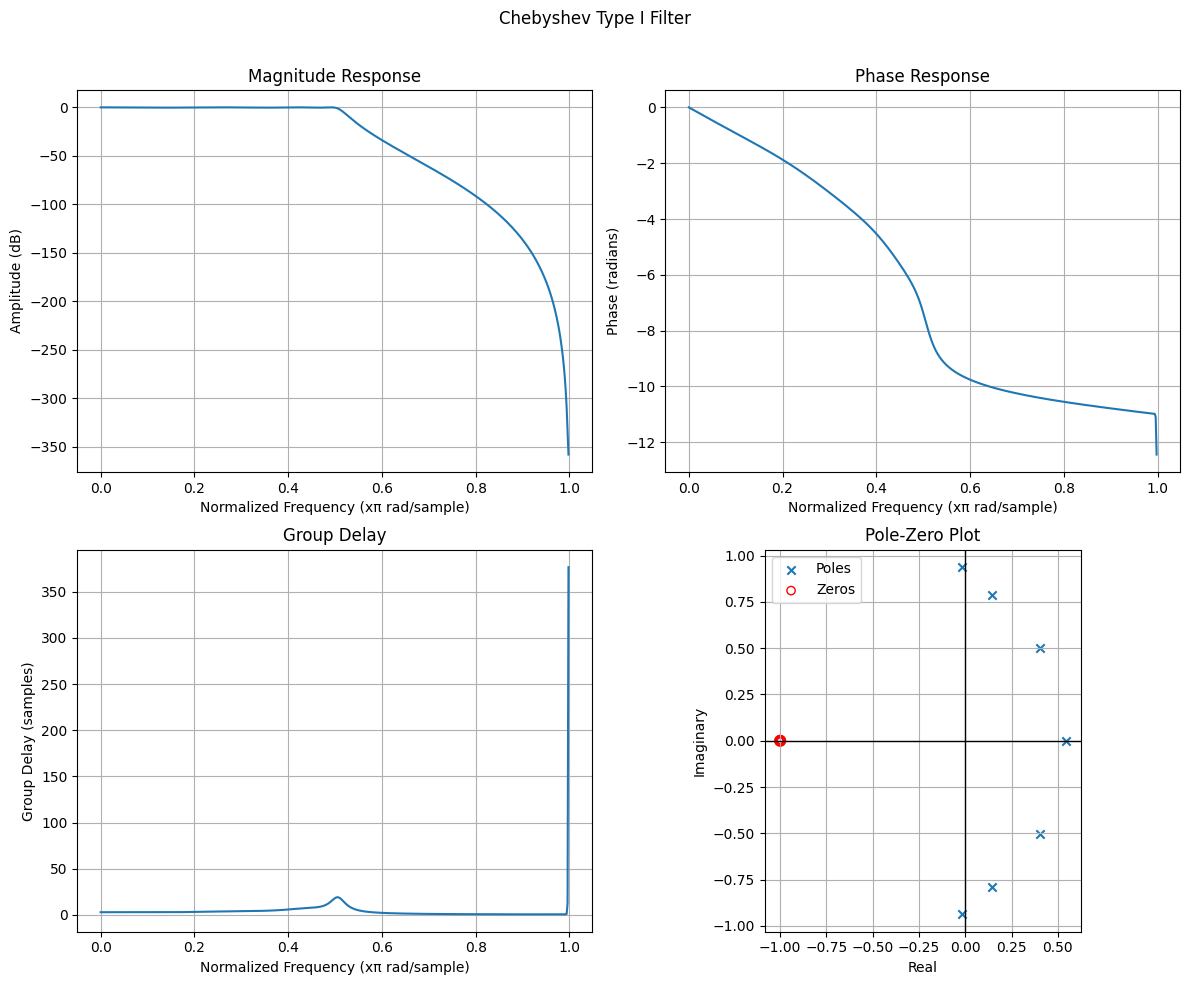

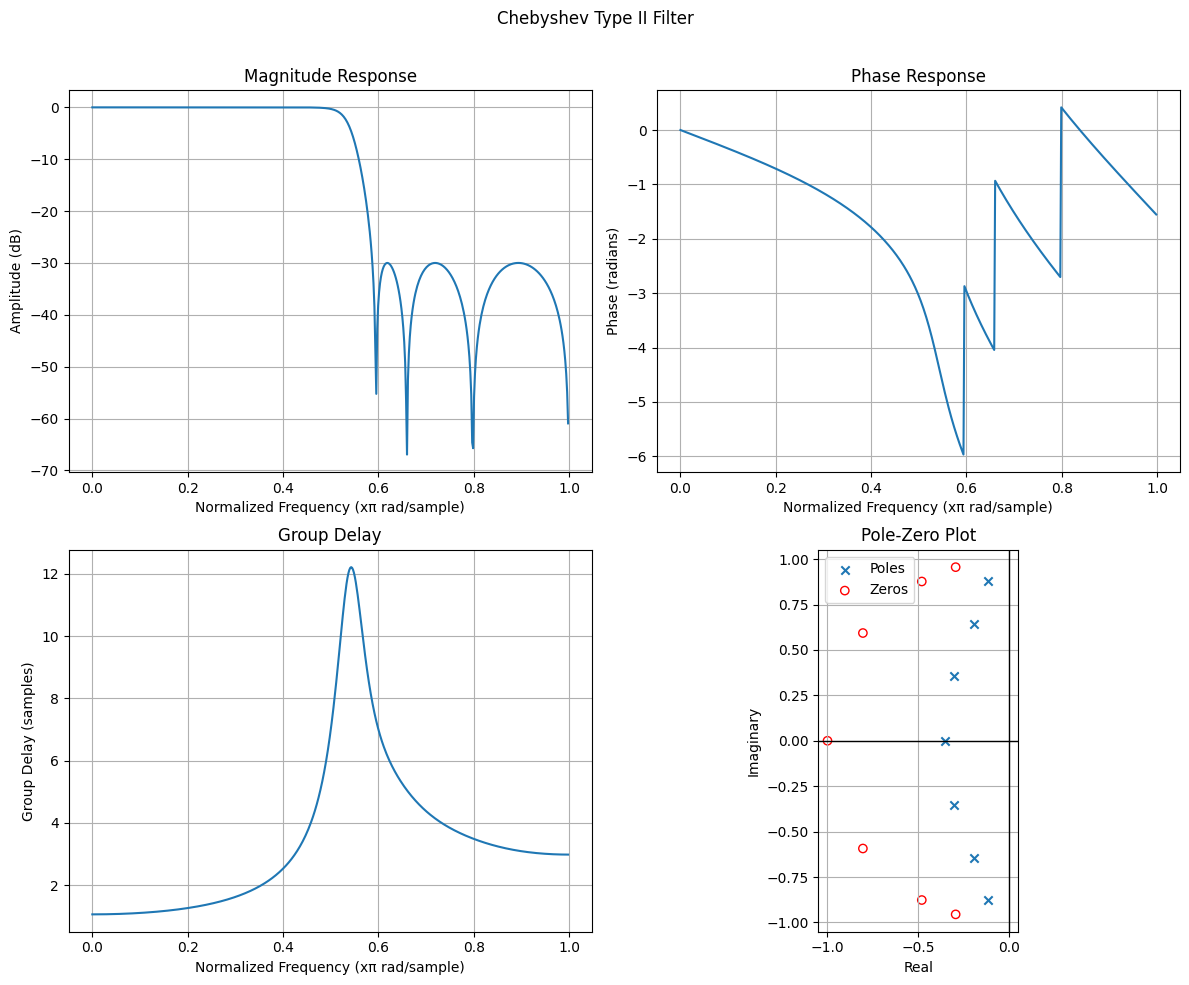

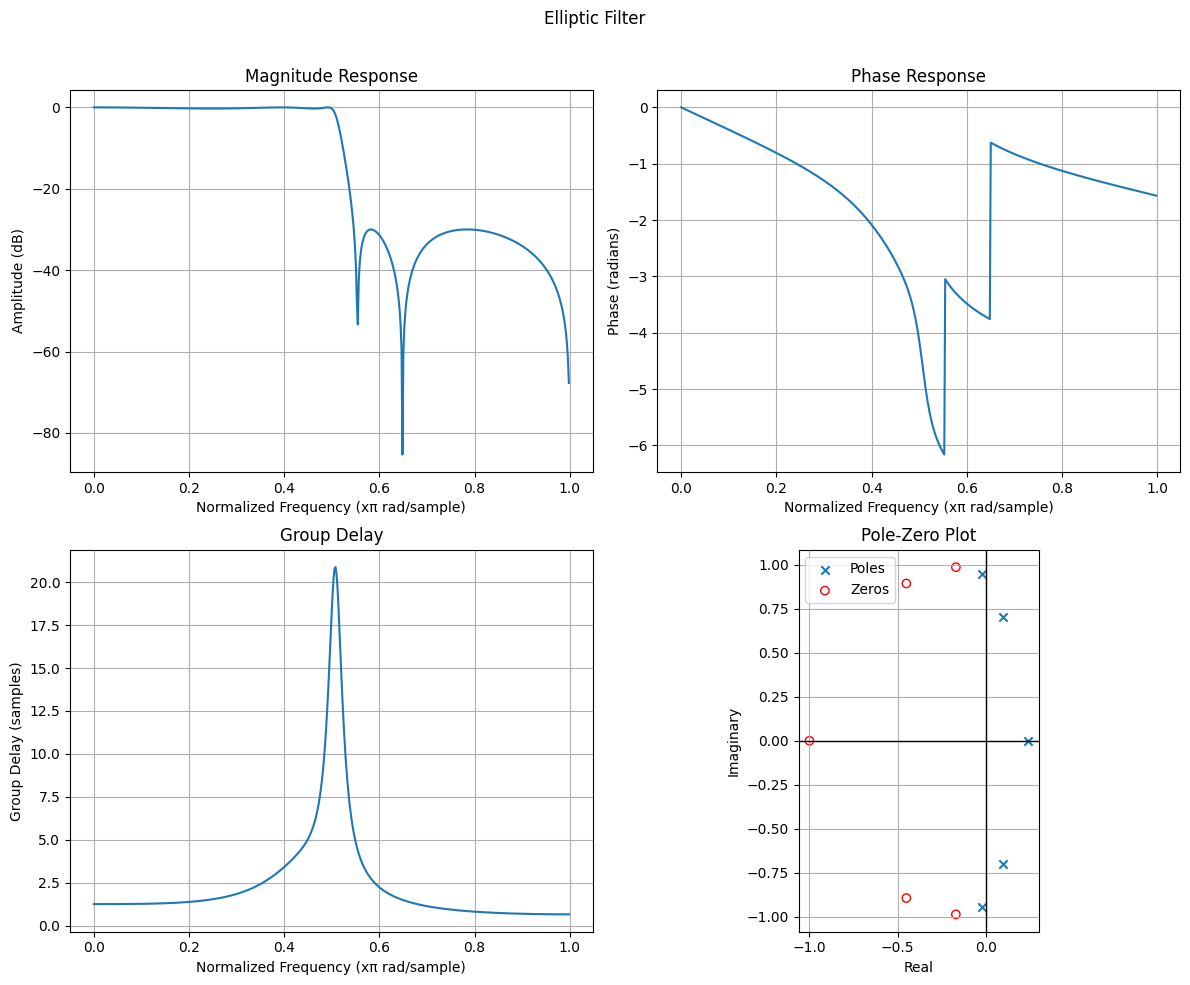

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Filter specifications
passband_edge = 0.5 * np.pi
stopband_edge = 0.6 * np.pi
passband_ripple = 0.3  # in dB
stopband_atten = 30    # in dB

# Normalize frequency to Nyquist Frequency (pi)
wp = passband_edge / np.pi
ws = stopband_edge / np.pi

# Compute orders and cutoff frequencies
N_butter, wn_butter = signal.buttord(wp, ws, passband_ripple, stopband_atten)
N_cheby1, wn_cheby1 = signal.cheb1ord(wp, ws, passband_ripple, stopband_atten)
N_cheby2, wn_cheby2 = signal.cheb2ord(wp, ws, passband_ripple, stopband_atten)
N_ellip, wn_ellip = signal.ellipord(wp, ws, passband_ripple, stopband_atten)

# Design filters
b_butter, a_butter = signal.butter(N_butter, wn_butter, btype='low')
b_cheby1, a_cheby1 = signal.cheby1(N_cheby1, passband_ripple, wn_cheby1, btype='low')
b_cheby2, a_cheby2 = signal.cheby2(N_cheby2, stopband_atten, wn_cheby2, btype='low')
b_ellip, a_ellip = signal.ellip(N_ellip, passband_ripple, stopband_atten, wn_ellip, btype='low')

# Helper function for plotting
def plot_filter_responses(b, a, title):
    w, h = signal.freqz(b, a)
    angles = np.unwrap(np.angle(h))
    gd = signal.group_delay((b, a))[1]

    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(title)

    ax[0, 0].plot(w / np.pi, 20 * np.log10(abs(h)))
    ax[0, 0].set_title('Magnitude Response')
    ax[0, 0].set_xlabel('Normalized Frequency (xπ rad/sample)')
    ax[0, 0].set_ylabel('Amplitude (dB)')
    ax[0, 0].grid()

    ax[0, 1].plot(w / np.pi, angles)
    ax[0, 1].set_title('Phase Response')
    ax[0, 1].set_xlabel('Normalized Frequency (xπ rad/sample)')
    ax[0, 1].set_ylabel('Phase (radians)')
    ax[0, 1].grid()

    ax[1, 0].plot(w / np.pi, gd)
    ax[1, 0].set_title('Group Delay')
    ax[1, 0].set_xlabel('Normalized Frequency (xπ rad/sample)')
    ax[1, 0].set_ylabel('Group Delay (samples)')
    ax[1, 0].grid()

    zeros, poles, _ = signal.tf2zpk(b, a)
    ax[1, 1].scatter(poles.real, poles.imag, marker='x', label='Poles')
    ax[1, 1].scatter(zeros.real, zeros.imag, facecolors='none', edgecolors='r', label='Zeros')
    ax[1, 1].set_title('Pole-Zero Plot')
    ax[1, 1].set_xlabel('Real')
    ax[1, 1].set_ylabel('Imaginary')
    ax[1, 1].set_aspect('equal')
    ax[1, 1].axvline(0, color='k', lw=1)
    ax[1, 1].axhline(0, color='k', lw=1)
    ax[1, 1].grid()
    ax[1, 1].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

# Plot filter responses
plot_filter_responses(b_butter, a_butter, 'Butterworth Filter')
plot_filter_responses(b_cheby1, a_cheby1, 'Chebyshev Type I Filter')
plot_filter_responses(b_cheby2, a_cheby2, 'Chebyshev Type II Filter')
plot_filter_responses(b_ellip, a_ellip, 'Elliptic Filter')

plt.show()


### Discussion:

Here I designed four different types of lowpass filters: Butterworth, Chebyshev Type I, Chebyshev Type II, and Elliptic, each with a normalized cutoff frequency of π/2. I observe that each filter type offers unique characteristics in terms of magnitude response, phase response, and group delay, which are evident from the plots generated.

1. **Butterworth Filter:** I notice that the Butterworth filter provides a smooth and flat response in the passband, which is desirable for applications requiring minimal passband distortion. However, the roll-off near the cutoff frequency is relatively gradual compared to the other filter types.

2. **Chebyshev Type I Filter:** I see that this filter type allows for a sharper roll-off than the Butterworth filter, at the cost of ripple in the passband. This can be useful when a steeper attenuation right after the cutoff is more critical than slight distortions in the passband.

3. **Chebyshev Type II Filter:** I observe that the Chebyshev Type II filter provides a sharper cutoff than the Butterworth but without ripple in the passband, unlike Chebyshev Type I. Instead, the ripple is in the stopband, which might be acceptable in scenarios where the clarity of the stopband is less critical.

4. **Elliptic Filter:** I notice that the elliptic filter exhibits the sharpest roll-off among the four types, which makes it highly efficient in terms of achieving a narrow transition band. However, this comes with ripples both in the passband and the stopband, which might not be suitable for all applications.


## Exercise #2

In this exercise, you are asked to design a bandstop (notch) filter to eliminate a frequency component in a signal. First, create a signal with three different frequency components. To remove the middle-frequency component, design and implement a Butterworth, Chebyshev, or elliptic bandstop filter. Explain your results and provide plots in the time domain of your signal before and after filtering, as well as your filter's magnitude response and pole/zero plot. Also, create a time-domain signal without the middle-frequency component to plot and compare it to the output to see how well your filter performed.

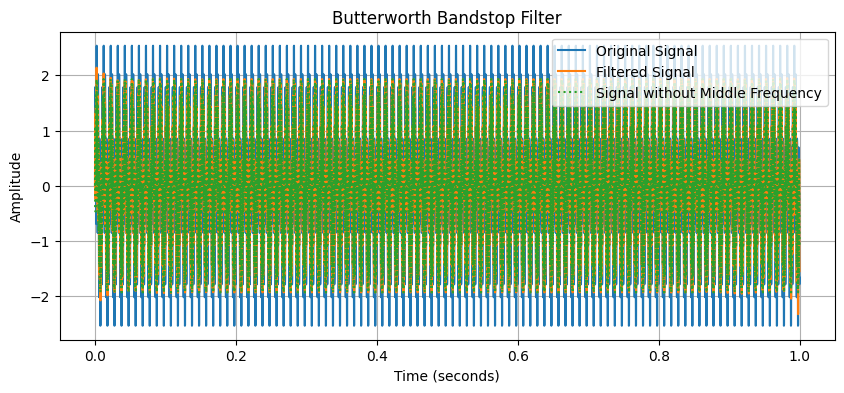

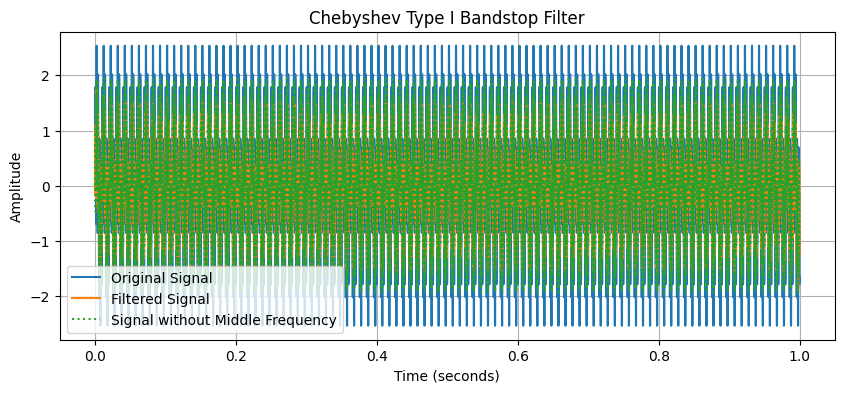

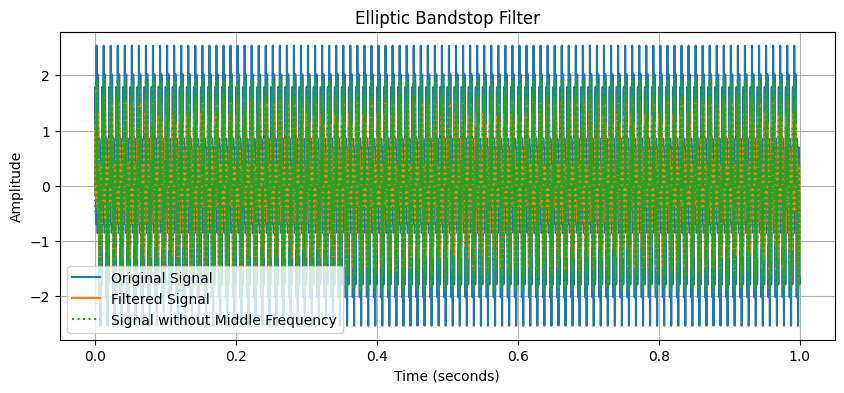

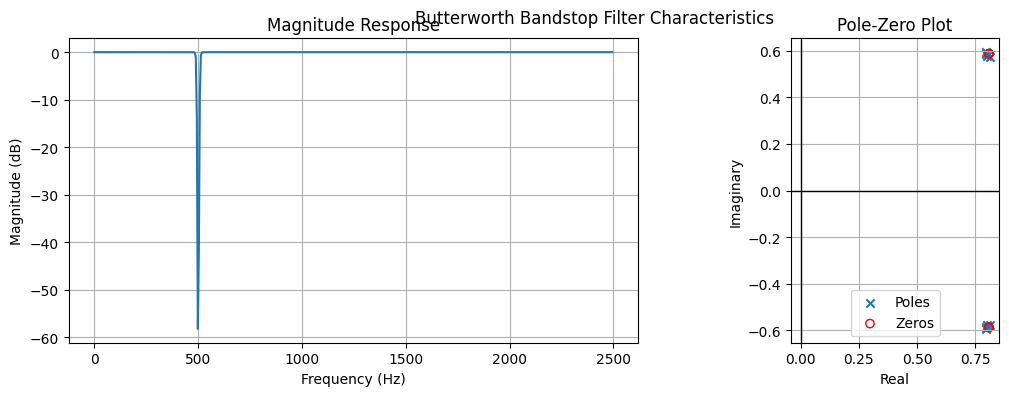

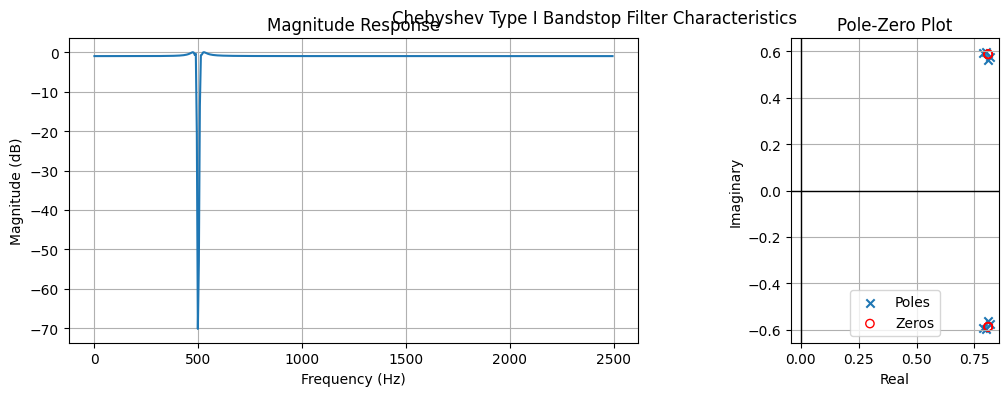

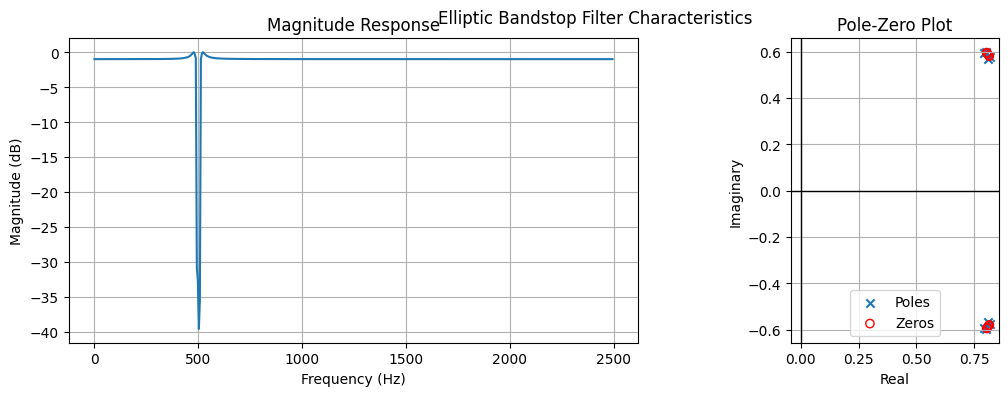

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the signal with multiple frequency components
Fs = 5000  # Sampling frequency
t = np.linspace(0, 1, Fs, endpoint=False)  # Time vector
f1 = 100  # Frequency of the first component
f2 = 500  # Frequency of the middle component to be removed
f3 = 1000  # Frequency of the third component
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Signal without the middle-frequency component
x_no_middle = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f3 * t)

# Design a bandstop filter
F1 = 490  # Lower edge of the stop band
F2 = 510  # Upper edge of the stop band
order = 4  # Order of the filter

# Butterworth bandstop filter
b_butter, a_butter = signal.butter(order, [F1, F2], btype='bandstop', fs=Fs)
y_butter = signal.filtfilt(b_butter, a_butter, x)

# Chebyshev Type I bandstop filter
b_cheby1, a_cheby1 = signal.cheby1(order, 1, [F1, F2], btype='bandstop', fs=Fs)
y_cheby1 = signal.filtfilt(b_cheby1, a_cheby1, x)

# Elliptic bandstop filter
b_ellip, a_ellip = signal.ellip(order, 1, 30, [F1, F2], btype='bandstop', fs=Fs)
y_ellip = signal.filtfilt(b_ellip, a_ellip, x)

# Plotting function
def plot_results(x, y, title):
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label='Original Signal')
    plt.plot(t, y, label='Filtered Signal')
    plt.plot(t, x_no_middle, label='Signal without Middle Frequency', linestyle=':')
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

# Plot original and filtered signals
plot_results(x, y_butter, 'Butterworth Bandstop Filter')
plot_results(x, y_cheby1, 'Chebyshev Type I Bandstop Filter')
plot_results(x, y_ellip, 'Elliptic Bandstop Filter')

# Function to plot frequency response and pole-zero plot
def plot_filter_characteristics(b, a, title):
    w, h = signal.freqz(b, a, fs=Fs)
    zeros, poles, _ = signal.tf2zpk(b, a)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(w, 20 * np.log10(abs(h)))
    ax[0].set_title('Magnitude Response')
    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Magnitude (dB)')
    ax[0].grid()

    ax[1].scatter(poles.real, poles.imag, marker='x', label='Poles')
    ax[1].scatter(zeros.real, zeros.imag, facecolors='none', edgecolors='r', label='Zeros')
    ax[1].set_title('Pole-Zero Plot')
    ax[1].set_xlabel('Real')
    ax[1].set_ylabel('Imaginary')
    ax[1].set_aspect('equal')
    ax[1].axvline(0, color='k', lw=1)
    ax[1].axhline(0, color='k', lw=1)
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.suptitle(title)

# Plot filter characteristics
plot_filter_characteristics(b_butter, a_butter, 'Butterworth Bandstop Filter Characteristics')
plot_filter_characteristics(b_cheby1, a_cheby1, 'Chebyshev Type I Bandstop Filter Characteristics')
plot_filter_characteristics(b_ellip, a_ellip, 'Elliptic Bandstop Filter Characteristics')

plt.show()




### Discussion:

In this case, I designed bandstop filters using Butterworth, Chebyshev, and Elliptic approaches to eliminate a specific frequency component (500 Hz) from a signal composed of multiple frequencies. I applied each filter to the signal and analyzed the results both visually and numerically.

1. **Butterworth Bandstop Filter:** I notice that the Butterworth filter achieves a reasonable suppression of the 500 Hz component, maintaining a relatively flat response in other frequency areas. This type of filter is beneficial when the primary concern is to avoid introducing ripple into the filtered signal.

2. **Chebyshev Bandstop Filter:** I observe that the Chebyshev filter provides a sharper attenuation at 500 Hz compared to the Butterworth filter. However, this comes with the introduction of some ripple in the passband, which is a typical characteristic of Chebyshev filters and could be a trade-off worth considering in applications requiring sharper cutoffs.

3. **Elliptic Bandstop Filter:** I see that the elliptic filter offers the sharpest attenuation around the 500 Hz frequency. This makes it highly effective for applications where the precise removal of a narrow frequency band is crucial. However, similar to its lowpass counterpart, it introduces ripples in both the passband and stopband.

From these insights, I conclude that while all three filters are capable of attenuating the 500 Hz component effectively, the choice of filter should be guided by specific requirements such as the acceptable level of ripple, the desired sharpness of the cutoff, and the overall impact on the signal. The zero-phase filtering approach helps in preserving the phase characteristics of the original signal, which is crucial in many practical applications.